In [4]:
from word_vec_loader import WordVectorLoader
import data
import numpy as np

In [2]:
data_path = './wordnet/noun_closure.tsv'
idx, objs, dwords = data.slurp(data_path, load_word=True, build_word_vector=True)
total_num = len(objs) + len(dwords)


Loading wordnet words
Total 40831 words are added
slurp: objects=82115, edges=801571, words=40831


In [5]:
import random

In [6]:
random.randint?

In [15]:
import random
dist = []
mean_this_to_other = []
count = 1000000
def norm(v):
    return np.sqrt(np.sum(v**2) ) 

def calc_dist(a, b):
    return np.sum(a * b) / (norm(a ) * norm(b))

vec = WordVectorLoader.word_vec
for i in range(len(WordVectorLoader.word_vec)):
    this_dist = []
    for _ in range(1000):
        b = random.randint(0, len(WordVectorLoader.word_vec) - 1)
        if b == i:
            continue
        v = calc_dist(vec[i], vec[b])
        dist.append(v)
        this_dist.append(v)
        if len(dist) % 100000 == 0:
            print(len(dist))
    mean_this_to_other.append(np.mean(this_dist))
    if len(dist) >= count:
        break


100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000


In [25]:
16.3 / 1000000 * len(vec) ** 2

27174.8801443

In [9]:
import seaborn as sns

%matplotlib inline

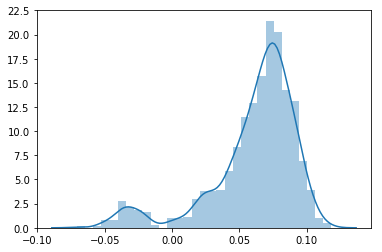

In [16]:
sns.distplot(mean_this_to_other)

In [20]:
dist = np.array(dist)

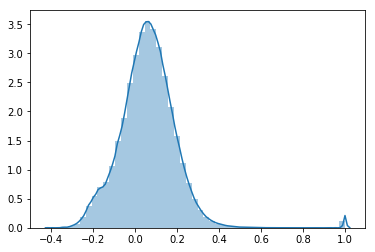

In [26]:
sns.distplot(dist)

In [24]:
len(vec) * len(vec) / 2e9

0.8335852805

In [51]:
np.mean(dist > 0.4)

0.007688496027876792

In [43]:
import random
random.sample([1,2,3], 1)

[2]